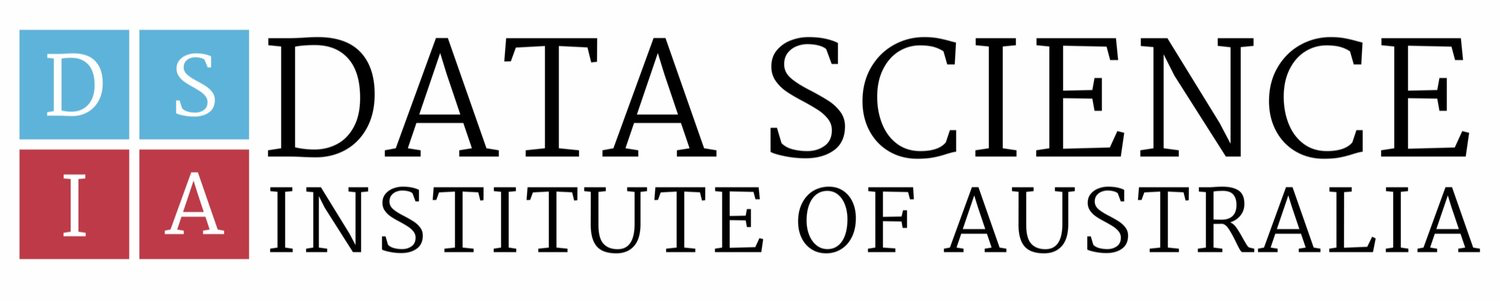

# Data Science and AI
## Lab 4.1 Linear Regression

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

## Prediction of House Price Using Linear Regression
### Data
The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
%matplotlib inline

import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set_context('poster')
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')

### 1. Explore Data
Perform EDA on this dataset. Use what you have learned so far.

In [3]:
# Read CSV
data = pd.read_csv('Sacramento_transactions.csv')

In [4]:
data.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
data.tail(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [8]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [9]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [10]:
data['sq__ft'] = data['sq__ft'].replace(0, np.NaN)
data = data.dropna()

### 2. Predict Price
We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [11]:
# insert code here
target_var = data['price']
target_var.head(5)


0    59222
1    68212
2    68880
3    69307
4    81900
Name: price, dtype: int64

#### 2.2 List all possible variables which might be Predictor variable.

In [12]:
# insert code here

#Zip, beds, baths, and sq_ft

#### 2.3 Find correlation between variables
Find correlation between variables. Which is the best predictor? Why? State your reason.

In [13]:
# insert code here
price_corr = data[['zip', 'beds', 'baths', 'sq__ft', 'price']].corr()['price'][:-1]
print(price_corr)

zip      -0.219591
beds      0.441988
baths     0.501820
sq__ft    0.693708
Name: price, dtype: float64


- `sq__ft` is the best predictor
- `sq__ft` got stong relationship with beds, baths

#### 2.4 What is the simplest way to predict price
So we have information for 985 houses. What is the easiest way to predict price of a house?

In [14]:
# insert code here
data['mean_price'] = data['price'].mean()
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,mean_price
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,229448.369779
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,229448.369779
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,229448.369779
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,229448.369779
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,229448.369779


#### 2. 5 Find Resudals
Find difference between actual value and predicted value. Use absolute value.

In [15]:
# insert code here
data['residual'] = abs(target_var - data['mean_price'])
data.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,mean_price,residual
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,229448.369779,170226.369779
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,229448.369779,161236.369779
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,229448.369779,160568.369779
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,229448.369779,160141.369779
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,229448.369779,147548.369779


In [18]:
data['residual'].mean()

88232.20396742529

#### 2.6  Predict Using Linear Regression
[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

#### 2.7 Define X, Y
- X = Predictor Variable 
- y = Target Variable

In [19]:
# insert code here
x = data['sq__ft']
y = data['price']

#### 2.7.A Calculate beta_1
$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [20]:
def calc_beta_1(x, y):
    '''
    calculate beta 1
    '''

    x_mean = x.mean()
    y_mean = y.mean()

    dividend_x = np.sum((y-y_mean) * (x-x_mean))
    divisor_y = np.sum((x-x_mean)**2)


    calculate_beta_1 = (dividend_x)/(divisor_y)
    
    return calculate_beta_1

In [21]:
beta_1 = calc_beta_1(x, y)
beta_1

125.21648667984462

#### 2.7.B Calculate beta_0
$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [22]:
def calc_beta_0 (x,y, beta_1):
    '''
    calculate beta 0
    '''
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    calculate_beta_0 = y_mean - (beta_1 * x_mean)
    
    return calculate_beta_0 
    

In [23]:
beta_0 = calc_beta_0 (x, y, beta_1)
beta_0

30210.633866918943

#### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)
$$\hat{y} = \beta_0 + \beta_1 x$$

In [24]:
Yhat = beta_0 + (beta_1 * x)

In [25]:
Yhat.head(5)

0    134891.616731
1    176338.273822
2    129882.957264
3    136895.080518
4    130008.173751
Name: sq__ft, dtype: float64

#### 2.7.D Find Residuals
$$ \text{residual}_i = y_i - \hat{y}_i$$

In [26]:
def calc_residual (y, Yhat):
   
    res = y - Yhat
    
    return res

In [27]:
residual = calc_residual (y,Yhat)
residual.abs().head(5)

0     75669.616731
1    108126.273822
2     61002.957264
3     67588.080518
4     48108.173751
dtype: float64

#### 2.7.E Find R-Square
Write a function to calculate R-Square value.
The total sum of squares:
$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [28]:
# insert code here
def calc_total_sum_of_square(y):
    y_mean = np.mean(y)
    SStot = np.square(y - y_mean)
    SStot = np.sum(SStot)
    return SStot

In [29]:
def calc_residual_sum_of_square(y, Yhat):
    SSres = np.square(y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [38]:
def calc_r_square(SStot, SSres):
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [39]:
SStot = calc_total_sum_of_square(y)

In [40]:
SSres = calc_residual_sum_of_square(y, Yhat)

In [41]:
calc_r_square(SStot, SSres)

0.4812307133326901

In [42]:
calc_r_square(y, Yhat)

0     -1.277728
1     -1.585150
2     -0.885641
3     -0.975198
4     -0.587401
5     -0.898372
6     -0.853233
7     -0.951500
8     -0.559869
9     -0.755751
10    -0.435887
11    -0.803432
12    -0.303431
13    -0.469102
14    -0.454546
15    -0.555611
16    -0.199804
17    -0.116196
18     0.134684
19    -0.644366
20    -0.395104
21    -0.602707
22    -0.507960
23    -0.858841
24    -0.144246
25    -0.314325
26    -0.184734
27    -0.320371
28    -0.547328
29    -0.412733
         ...   
952    0.065123
953    0.134816
954    0.376084
955    0.030577
956    0.067559
957    0.100852
958   -0.172990
959   -0.038510
960    0.005753
961    0.039272
962    0.345421
963   -0.214009
964    0.120802
965    0.055602
967    0.111949
968   -0.144745
969   -0.049049
971    0.283769
972    0.329244
974    0.055441
975    0.071164
976    0.125629
977    0.143253
978   -0.065030
979    0.181592
980   -0.358306
981    0.080533
982    0.223515
983   -0.025072
984    0.148396
Length: 814, dtype: floa

#### 2.7.F [BONUS] Draw Plot of Predicted Line

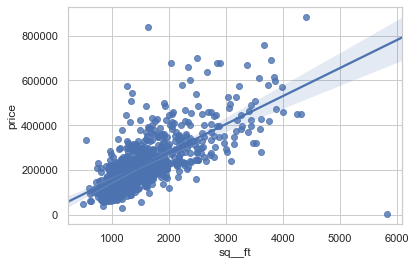

In [46]:
# insert code here
ax = sns.regplot (x,y, data=data)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [47]:
# insert code here
data['Yhat'] = Yhat

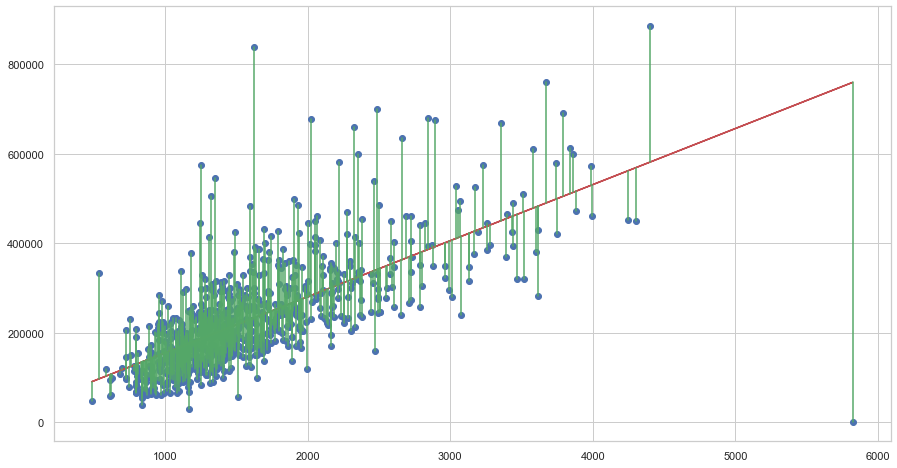

In [48]:
# create a figure
fig = plt.figure(figsize=(15, 7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=x, y=y, c='b')
ax.plot(x, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'],
              row['sq__ft']),
             (row['price'],
              row['Yhat']),
             'g-')

#### 2.8. Predict House Price
Let's assume we have information of following house:

- street: 1140 EDMONTON DR
- city:	SACRAMENTO
- zip: 95833
- state: CA
- beds:	3
- baths: 2
- sq__ft: 1204
- type:	Residential

**Predict the price of this house.**

In [49]:
# insert code here
x_pred = 1204
x_pred

1204

In [50]:
beta_0

30210.633866918943

In [51]:
beta_1

125.21648667984462

In [52]:
House_price = beta_1 * x_pred + beta_0

In [53]:
House_price

180971.28382945186

#### 2.9 Find Coefficient and Intercept using Linear Regression
Using `LinearRegression` of `sklearn.linear_model` package find Coefficient and Intercept.

In [54]:
# insert code here
X = data[['sq__ft']]
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[125.21648668] 30210.633866919146


#### 2.10 Find R Score
The coefficient $R^2$ is defined as $(1 - u/v)$, where $u$ is the residual sum of squares `((y_true - y_pred) ** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [55]:
linreg.score(X, y)

0.48123071333269

### 3. Splitting Data
#### 3.1 Create training and testing subsets
**Hint**: Using `train_test_split` method

In [56]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [140]:
# insert code here
print('About X_train')
print('- X_train info', '-' * 80)
print(X_train.info())
print('\n- X_train sample', '-' * 80)
print(X_train.sample(5))
print('=' * 100)
print('\nAbout y_train')
print('- y_train describe', '-' * 80)
print(y_train.describe())
print('\n- y_train sample', '-' * 80)
print(y_train.sample(5))

About X_train
- X_train info --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 352 to 491
Data columns (total 1 columns):
sq__ft    788 non-null int64
dtypes: int64(1)
memory usage: 12.3 KB
None

- X_train sample --------------------------------------------------------------------------------
     sq__ft
443     756
503       0
157       0
446    1250
469       0

About y_train
- y_train describe --------------------------------------------------------------------------------
count       788.000000
mean     237164.932741
std      139251.093141
min        1551.000000
25%      146187.500000
50%      213723.500000
75%      300125.000000
max      879000.000000
Name: price, dtype: float64

- y_train sample --------------------------------------------------------------------------------
449    234500
869     61000
916    165000
85     237800
225    205000
Name: price, dtype: int64


In [141]:
# Check training/test data
# About test
print('About X_test')
print('- X_test info', '-' * 80)
print(X_test.info())
print('\n- X_test sample', '-' * 80)
print(X_test.sample(5))
print('=' * 100)
print('\nAbout y_test')
print('- y_test describe', '-' * 80)
print(y_test.describe())
print('\n- y_test sample', '-' * 80)
print(y_test.sample(5))

About X_test
- X_test info --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 880 to 14
Data columns (total 1 columns):
sq__ft    197 non-null int64
dtypes: int64(1)
memory usage: 3.1 KB
None

- X_test sample --------------------------------------------------------------------------------
     sq__ft
67     1362
98     1541
490    1248
765    1857
932    1497

About y_test
- y_test describe --------------------------------------------------------------------------------
count       197.000000
mean     222061.588832
std      134434.210509
min        4897.000000
25%      131750.000000
50%      215000.000000
75%      289000.000000
max      884790.000000
Name: price, dtype: float64

- y_test sample --------------------------------------------------------------------------------
47     166357
33     138750
417    192000
163     80000
442    230000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score
1. Fit model using `X_train`, `y_train`
2. Find score using `x_test`, `y_test`

In [142]:
# insert code here
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[50.58433914] 169922.42608031543


#### 3.4 Using your model predict price of a house
Let's assume we have house which have 1000 square feet. What is the predicted value of that house? Use your model.

In [143]:
# insert code here
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1000

House_price = beta1 * x + beta0
print('Predicted house price: ', House_price[0])

Predicted house price:  220506.76521989674


In [144]:
x = [[1000]]
House_price = linreg.predict(x)
print('Predicted house price: ', House_price[0])

Predicted house price:  220506.76521989674
